In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df=pd.read_csv(mouse_drug_data_to_load)
clinical_df=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

final_df=mouse_df.merge(clinical_df,how='outer',on="Mouse ID")

acc_df=final_df
# Display the data table for preview

final_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

mean_df=final_df.groupby(['Drug','Timepoint'],as_index=False).agg({"Tumor Volume (mm3)":"mean"})

# Convert to DataFrame

# Preview DataFrame
tumor_df=pd.DataFrame(mean_df)
tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#test={[sem(s) for s in final_df["Tumor Volume (mm3)"]]}

#test
sem_df=final_df.groupby(['Drug','Timepoint'],as_index=False).agg({"Tumor Volume (mm3)":"sem"})

# Convert to DataFrame

# Preview DataFrame
semdf_df=pd.DataFrame(sem_df)
semdf_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames

mean_f_df=mean_df.pivot(index='Timepoint',columns='Drug')

# Preview that Reformatting worked

mean_f_df

mean_f_df['Tumor Volume (mm3)']

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [6]:
final_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


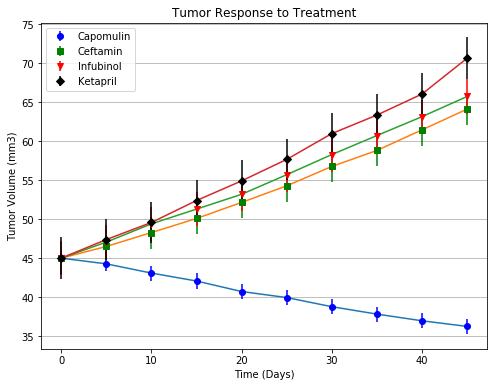

In [7]:
# Generate the Plot (with Error Bars)
final_df=mean_f_df['Tumor Volume (mm3)']

#final_df.index
#final_df.columns
#mean_f_df.columns
#mean_f_df['Tumor Volume (mm3)']
#mean_f_df.index
#mean_f_df
#ax=plt.gca()
#len(final_df)
#final_df.iloc[:,0]

#sem_df["Tumor Volume (mm3)":"sem"]



#for i in range(1,len(final_df)):
#fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,sharex=True)
error1=final_df.iloc[:,0].sem()
error2=final_df.iloc[:,1].sem()
error3=final_df.iloc[:,2].sem()
error4=final_df.iloc[:,3].sem()
    
plt.plot(final_df.index,final_df.iloc[:,0])
plt.errorbar(final_df.index,final_df.iloc[:,0],yerr=error1,fmt="o", color="b",label='Capomulin')

plt.plot(final_df.index,final_df.iloc[:,1])
plt.errorbar(final_df.index,final_df.iloc[:,1],yerr=error2,fmt="s", color="g",label='Ceftamin')
     
plt.plot(final_df.index,final_df.iloc[:,2])
plt.errorbar(final_df.index,final_df.iloc[:,2],yerr=error3,fmt="v", color="r",label='Infubinol')

plt.plot(final_df.index,final_df.iloc[:,3])
plt.errorbar(final_df.index,final_df.iloc[:,3],yerr=error4,fmt="D", color="k",label='Ketapril')
#fig, ax = plt.subplots()

#ax.errorbar(final_df.index,final_df.iloc[:,i],yerr=sem_df["Tumor Volume (mm3)"])


plt.legend(loc='Upper left')

plt.grid(axis='y')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 6)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

fig.savefig('test1png.png', dpi=100)




plt.show()

1. For treatment Capomulin tumor size is decreasing day by day which shows this medicine is effective than other 3 listed above

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

met_df=acc_df.groupby(['Drug','Timepoint']).agg({"Metastatic Sites":"mean"})

# Convert to DataFrame

# Preview DataFrame
met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

meterr_df=acc_df.groupby(['Drug','Timepoint']).agg({"Metastatic Sites":"sem"})
# Convert to DataFrame

# Preview DataFrame
meterr_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
met1_df=acc_df.groupby(['Drug','Timepoint'],as_index=False).agg({"Metastatic Sites":"mean"})

met1_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [11]:
# Minor Data Munging to Re-Format the Data Frames

met1_df=acc_df.groupby(['Drug','Timepoint'],as_index=False).agg({"Metastatic Sites":"mean"})


met_mug_df=met1_df.pivot(index='Timepoint',columns='Drug')

met_final_df=met_mug_df['Metastatic Sites']

met_final_df

# Preview that Reformatting worked
met_final_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


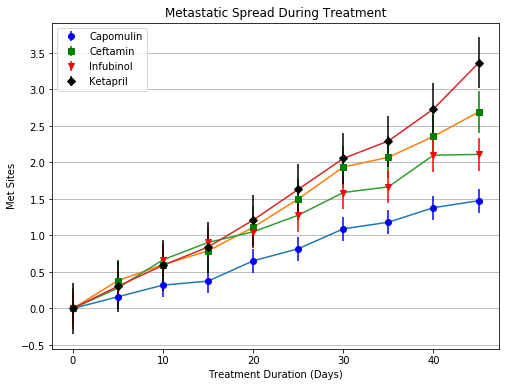

In [12]:
# Generate the Plot (with Error Bars)

error_1=met_final_df.iloc[:,0].sem()
error_2=met_final_df.iloc[:,1].sem()
error_3=met_final_df.iloc[:,2].sem()
error_4=met_final_df.iloc[:,3].sem()

plt.plot(met_final_df.index,met_final_df.iloc[:,0])
plt.errorbar(met_final_df.index,met_final_df.iloc[:,0],yerr=error_1,fmt="o", color="b",label='Capomulin')

plt.plot(met_final_df.index,met_final_df.iloc[:,1])
plt.errorbar(met_final_df.index,met_final_df.iloc[:,1],yerr=error_2,fmt="s", color="g",label='Ceftamin')

plt.plot(met_final_df.index,met_final_df.iloc[:,2])
plt.errorbar(met_final_df.index,met_final_df.iloc[:,2],yerr=error_3,fmt="v", color="r",label='Infubinol')

plt.plot(met_final_df.index,met_final_df.iloc[:,3])
plt.errorbar(met_final_df.index,met_final_df.iloc[:,3],yerr=error_4,fmt="D", color="k",label='Ketapril')





plt.legend(loc='Upper left')

plt.grid(axis='y')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 6)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met Sites")


fig.savefig('test2png.png', dpi=100)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

1. For the mices which has Capomulin treatment Metastatisis has reduced compared to other treatments. For Capomulin it is from 0-1.5 over more than 40 days which is a good sign

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mice_df=acc_df.groupby(['Drug','Timepoint'],as_index=False).agg({"Mouse ID":"count"})


# Convert to DataFrame

# Preview DataFrame
mice_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames

mice1_mug_df=mice_df.pivot(index='Timepoint',columns='Drug')

mice_final_mug_df=mice1_mug_df['Mouse ID']=mice1_mug_df['Mouse ID']
# Preview the Data Frame
mice_final_mug_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [15]:
#Calculate Percentage

val = len(mice_final_mug_df)

d1=mice_final_mug_df.iloc[0:1]
v1=d1['Capomulin'].iloc[0]
a=mice_final_mug_df.iloc[:,0].div(v1)*100
b=mice_final_mug_df.iloc[:,1].div(v1)*100
c=mice_final_mug_df.iloc[:,2].div(v1)*100
d=mice_final_mug_df.iloc[:,3].div(v1)*100

final_df=pd.merge(mice_final_mug_df,a,how='outer',on='Timepoint')
final_df = pd.merge(final_df,b,how='outer',on='Timepoint')
final_df = pd.merge(final_df,c,how='outer',on='Timepoint')
final_df = pd.merge(final_df,d,how='outer',on='Timepoint')
final_df

,Capomulin_x,Ceftamin_x,Infubinol_x,Ketapril_x,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol,Capomulin_y,Ceftamin_y,Infubinol_y,Ketapril_y
Timepoint,,,,,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25,100.0,100.0,100.0,100.0
5,25,21,25,23,23,24,25,25,25,24,100.0,84.0,100.0,92.0
10,25,20,21,22,21,24,23,24,23,22,100.0,80.0,84.0,88.0
15,24,19,21,19,21,20,17,24,23,21,96.0,76.0,84.0,76.0
20,23,18,20,19,20,19,17,23,21,17,92.0,72.0,80.0,76.0
25,22,18,18,19,18,17,14,23,19,16,88.0,72.0,72.0,76.0
30,22,16,17,18,15,15,13,23,18,15,88.0,64.0,68.0,72.0
35,22,14,12,17,15,14,10,21,16,14,88.0,56.0,48.0,68.0
40,21,14,10,15,15,12,9,20,12,14,84.0,56.0,40.0,60.0


In [16]:
mice_final_mug_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


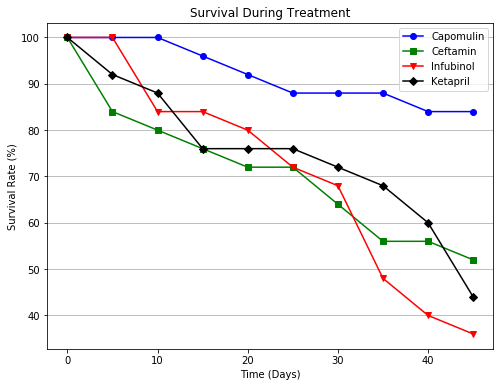

In [17]:
# Generate the Plot (Accounting for percentages)

plt.plot(mice_final_mug_df.index,final_df.iloc[:,10],marker="o", color="b",label='Capomulin')
plt.plot(mice_final_mug_df.index,final_df.iloc[:,11],marker="s", color="g",label='Ceftamin')
plt.plot(mice_final_mug_df.index,final_df.iloc[:,12],marker="v", color="r",label='Infubinol')
plt.plot(mice_final_mug_df.index,final_df.iloc[:,13],marker="D", color="k",label='Ketapril')

plt.legend(loc='Upper left')

plt.grid(axis='y')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 6)


plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Save the Figure

fig.savefig('test3png.png', dpi=100)

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

Even though survival rate has reduced from 100% for all treatments, Capomulin has better survival rate with in all four treatments

## Summary Bar Graph

In [76]:
agg_df=acc_df.groupby(['Drug','Timepoint'],as_index=False).agg({"Tumor Volume (mm3)":"mean"})

per_df=mean_df.pivot(index='Timepoint',columns='Drug') #diff_df= agg_df.pivot(index='Timepoint',columns='Drug')

shape=per_df.shape[1]

per_df=per_df['Tumor Volume (mm3)']

diff =[]

for i in range(0,shape):
    diff.append(int(((per_df.iloc[:,i][45] - per_df.iloc[:,i][0])/per_df.iloc[:,i][0])*100))

#print(diff) 


percentage = pd.Series(diff,index=per_df.columns)
percentage

Drug
Capomulin   -19
Ceftamin     42
Infubinol    46
Ketapril     57
Naftisol     53
Placebo      51
Propriva     47
Ramicane    -22
Stelasyn     52
Zoniferol    46
dtype: int64

In [77]:
# Calculate the percent changes for each drug

# Display the data to confirm


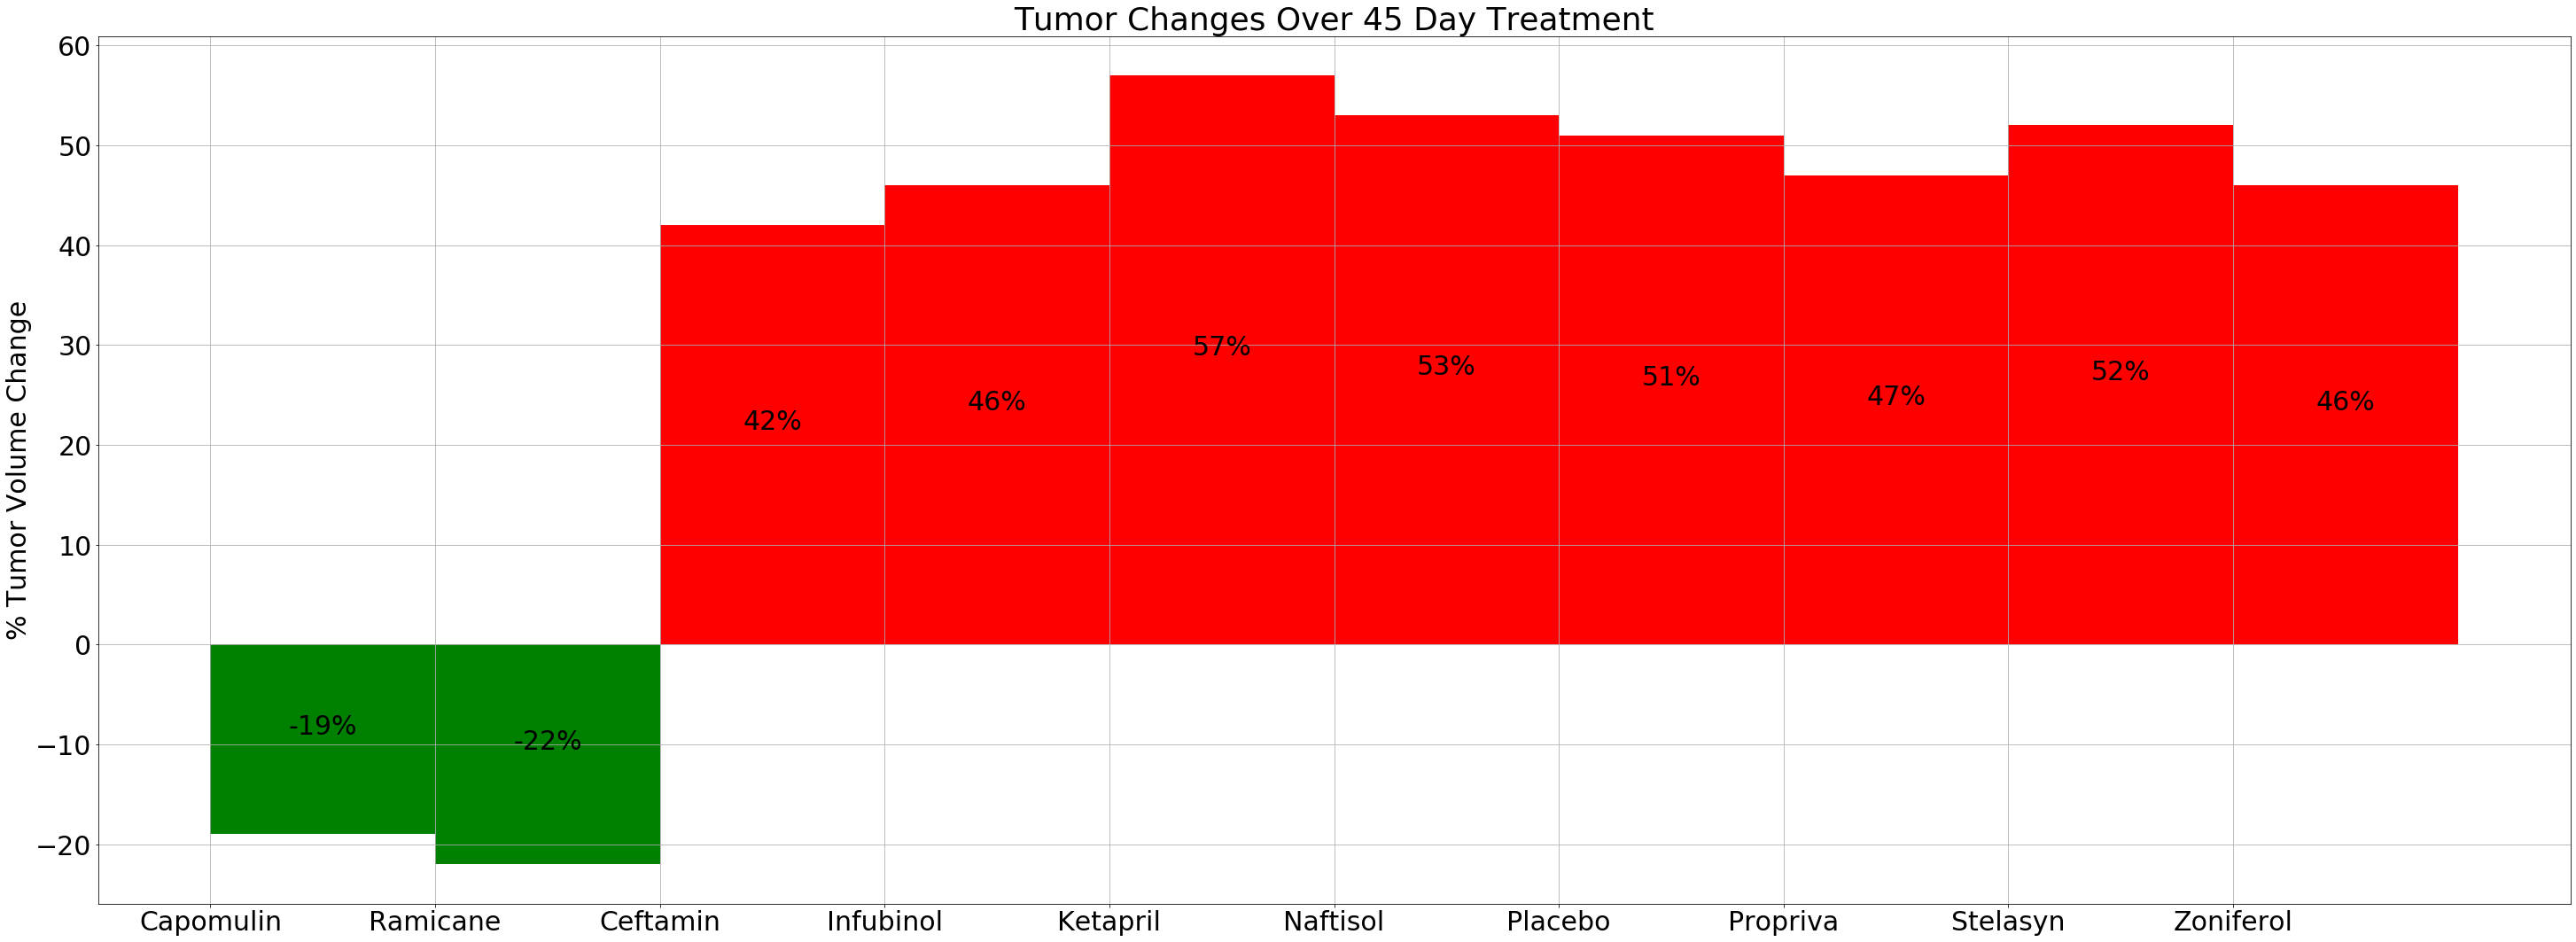

In [97]:
# Store all Relevant Percent Changes into a Tuple
per_array=[]

for i in percentage.values:
    per_arry.append(i)
    
    
per_tuple = tuple(per_arry)  

val_fail_array=[]
val_pass_array=[]

key_fail_array=[]
key_pass_array=[]

# Splice the data between passing and failing drugs

#for x in per_array:
#    if x <0:
#       val_pass_array.append(x)
#    else:
#       val_fail_array.append(x) 
    
     
#print(val_pass_array)    
#print(val_fail_array)

# Orient widths. Add labels, tick marks, etc. 

fig, ax = plt.subplots(figsize=(50,20))

x_axis = np.arange(len(percentage))
tick_locations = [value for value in x_axis]

mask1 = percentage.values<0
mask2 = percentage.values>0

rect1=ax.bar(percentage.index[mask1],percentage.values[mask1],color='g',alpha=1, align="edge",width=1)
rect2=ax.bar(percentage.index[mask2],percentage.values[mask2],color='r',alpha=1,align="edge",width=1)
# Use functions to label the percentages of changes

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        value = rect.get_x() + rect.get_width()/2
        ax.text(value, 0.5*height,
                '%d%%' % int(height),
        ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(rect1)
autolabel(rect2)

# Save the Figure

#x_pos = [i for i, _ in enumerate(percentage.index)]

#plt.xticks(tick_locations, percentage.index[mask1])
#plt.xticks(tick_locations, percentage.index[mask2])
plt.grid()

plt.title("Tumor Changes Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

plt.rcParams.update({'font.size': 30})

plt.subplots_adjust(bottom=0.2)

fig.savefig('test4png.png', dpi=100)

# Show the Figure
fig.show()


![Metastatic Spread During Treatment](../Images/change.png)

Treatments Capomulin and Remicane has redeuced the tumor volume, other treatsments has incresed the volume as show in the graph above